Assignment 1 - Smart Watch


Since you are a student of Coding Club, you are expected to work hard and get better results than others. To track your time and expected performance in the Machine Learning Challenge,Rishabh bhaiya has asked you to install walkatime on your device which is an efficient timetracking tool to track your daily coding activity.

In this challenge, Rishabh bhaiya gives you walkatime data of his past students and how theyperformed in the evaluation exam. Your task is to predict the score you will get given the amount of time you spend on coding daily.



Input​- You are given one feature corresponding to time noted by walkatime.
Output​- A scalar denoting the level of performance students achieved by devoting the giventime.

Please find the attached training and testing data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv('./Training_Data/Linear_X_Train.csv')
dfy = pd.read_csv('./Training_Data/Linear_Y_Train.csv')

x = dfx.values
y = dfy.values

x = x.reshape((-1,))
y = y.reshape((-1,))
print(x.shape)
print(y.shape)

(3750,)
(3750,)


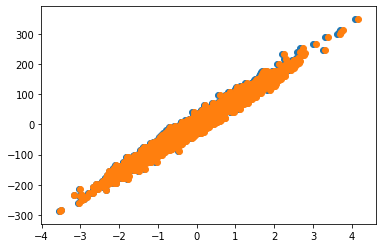

In [3]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

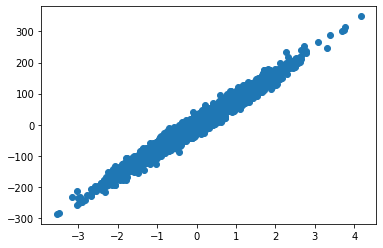

In [4]:
plt.scatter(X,Y)
plt.show()

Gradient Descent Algorithm

    Start with a random theta
    Repeat until converge
        Update Theta according to the rule



In [23]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x


def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.0001):
    
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list

In [24]:
final_theta, error_list,theta_list = gradientDescent(X,Y)

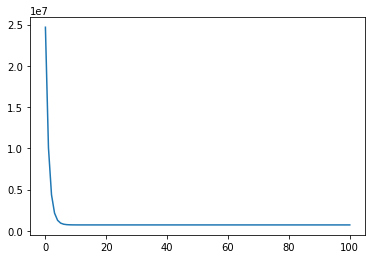

In [25]:
plt.plot(error_list)
plt.show()

In [26]:
print(final_theta)

[ 0.68386897 79.90573694]


In [27]:
testingdata = pd.read_csv('./Testing_Data/Linear_X_Test.csv')
xat = testingdata.values
xat = xat.reshape((-1,))

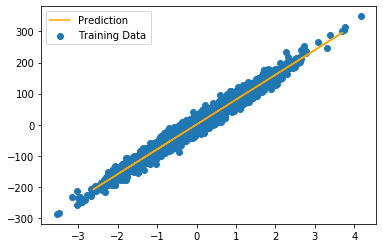

In [28]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xat,hypothesis(xat,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()